<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# Model Development with Tidyverse

Estimated Time Needed: **45 min**


<h3>Welcome!</h3>
<p>In this section, we will examine model development by trying to predict the arrival delay of a flight using our dataset. </p>

<p>A model or estimator can be thought of as a mathematical equation used to predict a value given one or more other values. Relating one or more independent variables or features to dependent variables. </p>

<p>For example, you input a flight’s departure delay as the independent variable or feature, the output of the model or dependent variable is the arrival delay. Usually the more relevant data you have the more accurate your model is.</p>


<p>In data analysis, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

<p>In this lab you will learn about:</p>

*   Simple Linear Regression

*   Multiple Linear Regression

*   Polynomial Regression


## Table of Contents

*   [1. Simple Linear Regression](#slr)
*   [2. Multiple Linear Regression](#mlr)
*   [3. Assessing the Model Visually](#assess_vis)
*   [4. Polynomial Regression](#poly_reg)
*   [5. Assessing the Model](#assess)
*   [6. Prediction and Decision Making](#pred)


<a class="anchor" id="import_data"></a>

## Load Libraries and Data


First, load the tidyverse library.


In [2]:
# Load tidyverse
library(tidyverse)

The original Airline dataset is hosted on <a href="https://developer.ibm.com/exchanges/data/all/airline/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2021-01-01">IBM Data Asset eXchange</a>. This sample dataset can be found <a href="https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2021-01-01">here</a>.

Now using the subset dataset link, you can load it and store as a dataframe `sub_airline`:


In [3]:
# url where the data is located
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"

# download the file
download.file(url, destfile = "lax_to_jfk.tar.gz")

# if you run this on your local machine, then can remove tar = "internal" 
untar("lax_to_jfk.tar.gz", tar = "internal")

# read_csv only 
sub_airline <- read_csv("lax_to_jfk/lax_to_jfk.csv",
                     col_types = cols('DivDistance' = col_number(), 
                                      'DivArrDelay' = col_number()))

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

<a class="anchor" id="slr"></a>

## 1. Simple Linear Regression


One example of a Data  Model that we will be using is **Simple Linear Regression**.

<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li> $X$: The predictor/independent variable</li>
    <li> $Y$: The response/dependent variable (that we want to predict)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


**Linear Model Function:**
$$
\hat{Y} = b\_0 + b\_1  X
$$


<ul>
    <li>$b_0$ refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>$b_1$ refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
    <li>$\hat{Y}$ (y-hat) is the predicted value from the linear model</li>
</ul>


<h4>Fit the data into a linear regression model</h4>

First, let's just look at just Alaska Airline (AA) data, so filter the data first. We also filter out the NAs in CarrierDelay because you will use that variable later.


In [6]:
# Define dataset with just AA as the Reporting_Airline
aa_delays <- sub_airline %>%
  filter(CarrierDelay != "NA", Reporting_Airline == "AA") #or !is.na(CarrierDelay)

head(aa_delays)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,4,2006-06-01,AA,LAX,JFK,1515,2332,1507,2353,⋯,21,0,0,21,0,0,-8,0,NA,NA
6,5,2013-06-28,AA,LAX,JFK,1200,2045,1328,2220,⋯,95,5,0,7,0,83,88,88,NA,NA
10,3,2005-10-12,AA,LAX,JFK,0930,1755,0958,1823,⋯,28,0,0,28,0,0,28,28,NA,NA
4,6,2011-04-23,AA,LAX,JFK,0925,1800,1040,1850,⋯,50,0,0,50,0,0,75,75,NA,NA
8,7,2011-08-14,AA,LAX,JFK,1100,1945,1200,2042,⋯,57,0,0,57,0,0,60,60,NA,NA
2,5,2004-02-06,AA,LAX,JFK,1500,2306,1607,2348,⋯,42,0,0,0,0,42,67,67,NA,NA


For this example, we want to look at how departure delay (DepDelayMinutes) can help us predict arrival delay (ArrDelayMinutes).
Using simple linear regression, we will create a linear function with "DepDelayMinutes" as the predictor variable and the "ArrDelayMinutes" as the response variable. You can use base R's function `lm()` to create a linear model.


In [7]:
linear_model <- lm(ArrDelayMinutes ~ DepDelayMinutes, data = aa_delays)
linear_model


Call:
lm(formula = ArrDelayMinutes ~ DepDelayMinutes, data = aa_delays)

Coefficients:
    (Intercept)  DepDelayMinutes  
        17.3544           0.7523  


Summarize the regression model using `summary()`. The output displays the learned coefficients ("Estimate" in the output) of the model, $b\_0$ and $b\_1$ as well as other information about the fitted model.


In [8]:
summary(linear_model)


Call:
lm(formula = ArrDelayMinutes ~ DepDelayMinutes, data = aa_delays)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.234 -12.716  -1.354   7.747  93.646 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      17.3544     2.5084   6.919  2.9e-10 ***
DepDelayMinutes   0.7523     0.0399  18.855  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.03 on 113 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7567 
F-statistic: 355.5 on 1 and 113 DF,  p-value: < 2.2e-16


We can output a prediction of three new data points.


In [9]:
# Input data we use to predict
new_depdelay <- data.frame(
  DepDelayMinutes = c(12, 19, 24))

# Predict the data points
pred <- predict(linear_model, newdata = new_depdelay, interval = "confidence")
pred

,fit,lwr,upr
1,26.38175,21.98838,30.77512
2,31.64769,27.52630,35.76908
3,35.40907,31.44593,39.37222


When we print the `pred` object, we can see that there are 3 columns: fit, lwr and upr. The "fit" column is the prediction results of the inputs. And "lwr" and "upr" are the lower bound and upper bound of the 95% confidence intervals of prediction results. The confidence interval reflects the uncertainty around the mean predictions.

For example, given that the DepDelayMinutes is 12, then the model predicts the ArrDelayMinutes to be 26.38, and we are 95% confident that the interval (21.98, 30.77) captures the true mean arrival delay for this instance.

<h4>What is the value of the intercept ($b_0$) and the Slope ($b_1$)?</h4>

Using the fitted model, `linear_model`, you can grab the attribute `coefficients` using `$`. These coefficients correspond to $b\_0$ (the intercept) and $b\_1$ (the slope and coefficient of DepDealyMinutes).


In [10]:
linear_model$coefficients
coefficients(linear_model)

(Intercept) DepDelayMinutes 
     17.3544286       0.7522769

(Intercept) DepDelayMinutes 
     17.3544286       0.7522769

<h3>What is the final estimated linear model we get?</h3>


As we saw above, we should get a final linear model with the structure:


$$
\hat{Y} = b\_0 + b\_1  X
$$


Remember that we are predicting ArrDelayMinutes using DepDealyMinutes. So, plugging in the actual values we get:


$$
ArrDelayMinutes = 17.35 + 0.7523 *  DepDelayMinutes
$$


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear function with "CarrierDelay" as the predictor variable and the "ArrDelayMinutes" as the response variable. </b>

</div>


In [12]:
# Write your code below and press Shift+Enter to execute 
#arr_delaym <- sub_airline %>% filter(!is.na(ArrDelayMinutes), !is.na(CarrierDelay), Reporting_Airline == "AA") %>%
#                                                                lm(ArrDelayMinutes~CarrierDelay, data=.)

#summary(arr_delaym)

linear_model2 <- lm(ArrDelayMinutes~CarrierDelay, data = aa_delays)
summary(linear_model2)
coefficients(linear_model2)


Call:
lm(formula = ArrDelayMinutes ~ CarrierDelay, data = aa_delays)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.665 -17.259  -9.276   6.515 155.882 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.11761    3.38591  10.372  < 2e-16 ***
CarrierDelay  0.70318    0.08276   8.497 8.93e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.85 on 113 degrees of freedom
Multiple R-squared:  0.3898,	Adjusted R-squared:  0.3844 
F-statistic:  72.2 on 1 and 113 DF,  p-value: 8.927e-14


(Intercept) CarrierDelay 
  35.1176108    0.7031761

<details>
    <summary>Click here for the solution.</summary>

```r
linear_model2 <- lm(ArrDelayMinutes ~ CarrierDelay, 
                 data = aa_delays)
                 
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 b):</h1>

<b>Find the coefficients (intercept and slope) of the model.</b>

</div>


In [25]:
# Write your code below and press Shift+Enter to execute 
arr_delaym$coefficients

(Intercept) CarrierDelay 
  35.1176108    0.7031761

<details>
    <summary>Click here for the solution.</summary>

```r
linear_model2$coefficients              
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 c): </h1>

<b>What is the equation of the predicted line. You can use x and yhat or 'CarrierDelay' or 'ArrDelayMinutes'?</b>

</div>


*You can type you answer here*
ArrDelayMinutes = 35.1176 + 0.703176*CarrierDelay

<details>
    <summary>Click here for the solution.</summary>

```r
# using X and Y  
Yhat = 35.11 + 0.7032 * X

ArrDelayMinutes = 35.11 + 0.7032 * CarrierDelay          
```

</details>


<a class="anchor" id="mlr"></a>

## 2. Multiple Linear Regression


What if we want to predict arrival delay minutes using *more than one* variable?

<p>If we want to use more variables in our model to predict arrival delay minutes, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using two predictor variables, but these results can generalize to any amount of predictor variables:</p>


*   $Y$: Response Variable
*   $X\_1$: Predictor Variable 1
*   $X\_2$: Predictor Variable 2


The equation is given by


$$
\hat{Y} = b\_0 + b\_1 X\_1 + b\_2 X\_2
$$


where,

*   $b\_0$: intercept
*   $b\_1$:coefficient of Variable 1
*   $b\_2$: coefficient of Variable 2


<p>From the previous lab we know that other good predictors of ArrDelayMinutes could be:</p>
<ul>
    <li>DepDelayMinutes</li>
    <li>LateAircraftDelay</li>
</ul>

Let's develop a model using these variables as the predictor variables by fitting the data.


In [13]:
mlr <- lm(ArrDelayMinutes ~ DepDelayMinutes + LateAircraftDelay, data = aa_delays)

summary(mlr)


Call:
lm(formula = ArrDelayMinutes ~ DepDelayMinutes + LateAircraftDelay, 
    data = aa_delays)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.188 -12.545  -1.317   7.791  93.683 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       17.31707    2.53786   6.823 4.78e-10 ***
DepDelayMinutes    0.75556    0.04822  15.668  < 2e-16 ***
LateAircraftDelay -0.01028    0.08407  -0.122    0.903    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.11 on 112 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7545 
F-statistic: 176.2 on 2 and 112 DF,  p-value: < 2.2e-16


What is the value of the intercept ($b\_0$) and the coefficients ($b\_1$, $b\_2$)?


In [27]:
mlr$coefficients

(Intercept)   DepDelayMinutes LateAircraftDelay 
      17.31706644        0.75555543       -0.01027513

What is the final estimated linear model that we get?


As we saw above, we should get a final linear function with the structure:

$$
\hat{Y} = b\_0 + b\_1 X\_1 + b\_2 X\_2
$$

What is the linear function we get in this example?


$$ ArrDelayMinutes = 17.32 + 0.7556 \* DepDelayMinutes - 0.0103 \*  LateAircraftDelay $$


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
Create and train a Multiple Linear Regression model "mlr2" where the response variable is ArrDelayMinutes, and the predictor variable is 'DepDelayMinutes', 'LateAircraftDelay' and 'CarrierDelay'.
</div>


In [14]:
# Write your code below and press Shift+Enter to execute 
mlr2 <- lm(ArrDelayMinutes ~ DepDelayMinutes + LateAircraftDelay + CarrierDelay, data = aa_delays)
summary(mlr2)


Call:
lm(formula = ArrDelayMinutes ~ DepDelayMinutes + LateAircraftDelay + 
    CarrierDelay, data = aa_delays)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.711 -12.875  -0.265   6.105  92.735 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        18.2650     2.5820   7.074 1.43e-10 ***
DepDelayMinutes     0.6107     0.0995   6.137 1.33e-08 ***
LateAircraftDelay   0.1536     0.1292   1.189   0.2370    
CarrierDelay        0.1799     0.1083   1.661   0.0996 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.96 on 111 degrees of freedom
Multiple R-squared:  0.7647,	Adjusted R-squared:  0.7583 
F-statistic: 120.2 on 3 and 111 DF,  p-value: < 2.2e-16


<details>
    <summary>Click here for the solution.</summary>

```r
mlr2 <- lm(
        ArrDelayMinutes ~ DepDelayMinutes + 
        LateAircraftDelay + CarrierDelay, 
        data = aa_delays)

summary(mlr2)         
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Find the coefficients of the model?</b>
</div>


In [15]:
# Write your code below and press Shift+Enter to execute 
mlr2$coefficient

(Intercept)   DepDelayMinutes LateAircraftDelay      CarrierDelay 
       18.2649917         0.6106613         0.1536269         0.1799444

<details>
    <summary>Click here for the solution.</summary>

```r

mlr2$coefficient        
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 c): </h1>
<b>Using the fitted model, mlr2, what are the predicted values for the following new data points?</b>
</div>


In [16]:
# New data points
DepDelayMinutes <- c(10, 20, 30)
LateAircraftDelay <- c(20, 60, 30)
CarrierDelay <- c(40, 15,60)
new_multidelay <- data.frame(DepDelayMinutes, LateAircraftDelay, CarrierDelay)

In [21]:
# Write your code below and press Shift+Enter to execute 
predict(mlr2, newdata = new_multidelay, interval = "confidence")

,fit,lwr,upr
1,34.64192,21.48909,47.79474
2,42.39500,26.09774,58.69226
3,51.99030,36.30002,67.68059


<details>
    <summary>Click here for the solution.</summary>

```r

pred <- predict(mlr, 
        newdata = new_multidelay, 
        interval = "confidence")  
```

</details>


<a class="anchor" id="assess_vis"></a>

## 3. Assessing Models Visually


Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.


<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

Regression plots are a good estimate of:

*   The relationship between two variables,
*   The strength of the correlation, and
*   The direction of the relationship (positive or negative).

There are several ways to plot a regression plot; a simple way is to use "ggplot" from the tidyverse library.

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

Let's visualize the DepDelayMinutes and ArrDelayMinutes of Alaska Airlines subset dataframe which we created earlier. Recall from the previous lab that to visualize a fitted linear model using `ggplot`, you can use `geom_smooth()`. Additionally, you can use `stat_smooth()` to create the same model. Like before, the default model if unspecified is `formula = y ~ x`. In this case, you will predict arrival delay minutes using depature delay minutes. So the predictor variable is "DepDelayMinutes" and the response variable is "ArrDelayMinutes".


`geom_smooth()` using formula 'y ~ x'


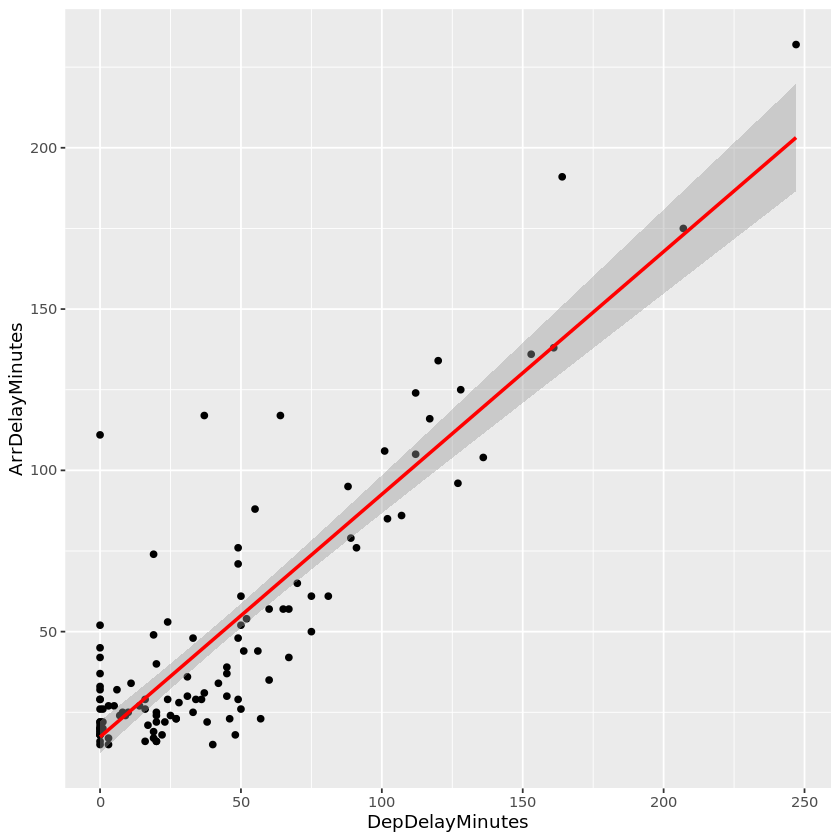

In [25]:
ggplot(aa_delays, aes(x = DepDelayMinutes, y = ArrDelayMinutes)) +
  geom_point() +
  stat_smooth(method = "lm", col = "red") #+
    #geom_smooth(method = "lm", col = "red") makes the residual line darker

<p>We can see from this plot that Arrival Delay Minutes (ArrDelayMinutes) is positively correlated to Departure Delay Minutes (DepDelayMinutes), since the regression slope is positive.</p>

<p>One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3 a):</h1>
<b>Create a regression plot of "CarrierDelay" and "ArrDelayMinutes" using "aa_delays" dataset</b>
</div>


`geom_smooth()` using formula 'y ~ x'


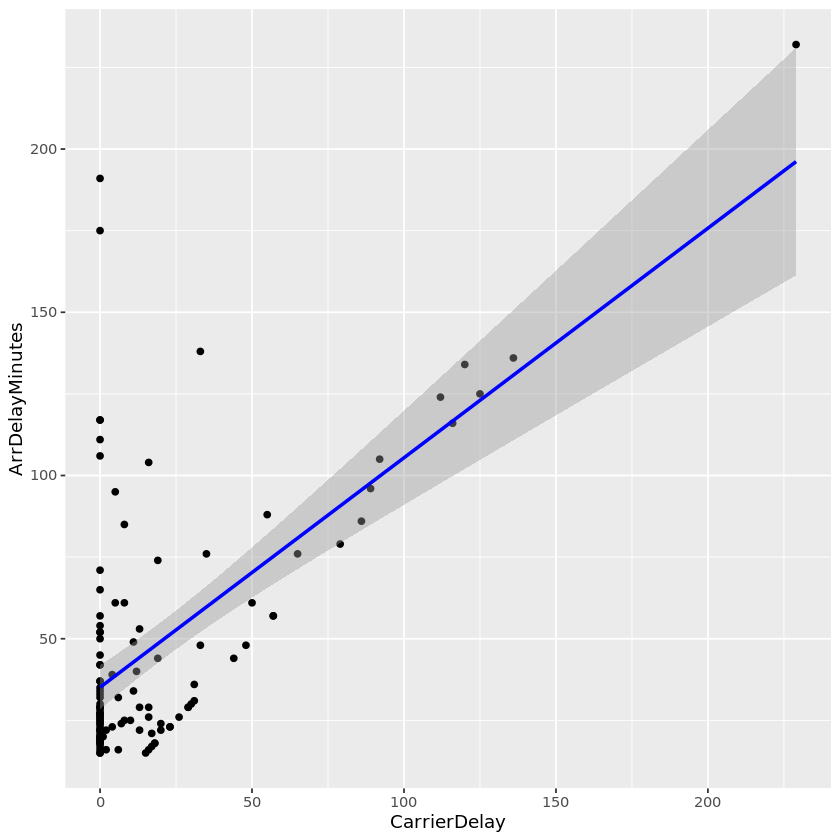

In [26]:
# Write your code below and press Shift+Enter to execute 
aa_delays %>% ggplot(aes(y = ArrDelayMinutes, x = CarrierDelay)) +
                geom_point() + 
                geom_smooth(method = "lm", color = "blue")

<details>
    <summary>Click here for the solution.</summary>

```r
ggplot(
    aa_delays, 
    aes(x = CarrierDelay, y = ArrDelayMinutes)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "red")
  
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3 b):</h1>
<b>Given the regression plots above is "DepDelayMinutes" or "CarrierDelay" more strongly correlated with "ArrDelayMinutes". Use the method  "cor()" to verify your answer.</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details>
    <summary>Click here for the solution.</summary>

```r
# The variable "DepDelayMinutes" has a stronger correlation with "ArrDelayMinutes", it is approximately 0.871  compared to "CarrierDelay" which is approximately 0.624. You can verify it using the following commands:

cor(aa_delays'$DepDelayMinutes, 
    aa_delays'$ArrDelayMinutes)
cor(aa_delays'$CarrierDelay, 
    aa_delays'$'ArrDelayMinutes)
```

</details>


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot. Before we start creating residual plots let's first answer the following questions:</p>

*   What is a **residual**?
    *   The difference between the observed value ($Y$) and the predicted value ($\hat{Y}$) is called the residual (or error). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.
*   What is a **residual plot**?
    *   A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.
*   What do we pay attention to when looking at a residual plot?
    *   **Homoscedasticity**: If the residual plot is homoscedastic, then the points in the plot are **randomly spread out around the x-axis**, which means that a **linear model is appropriate** for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

Now, let's look again at the regression plot of ArrDelayMinutes as the response and DepDelayMinutes as the predictor. This time, let's visualize the residuals on this plot.

*   The red line is the regression line
*   The black dots represent the observed values of ArrDelayMinutes
*   The white dots are the predicted values from the linear regression model
*   The light gray lines are the residuals, or errors. It shows how far away the observed values are from the predicted values. So a longer line means a larger error.


`geom_smooth()` using formula 'y ~ x'


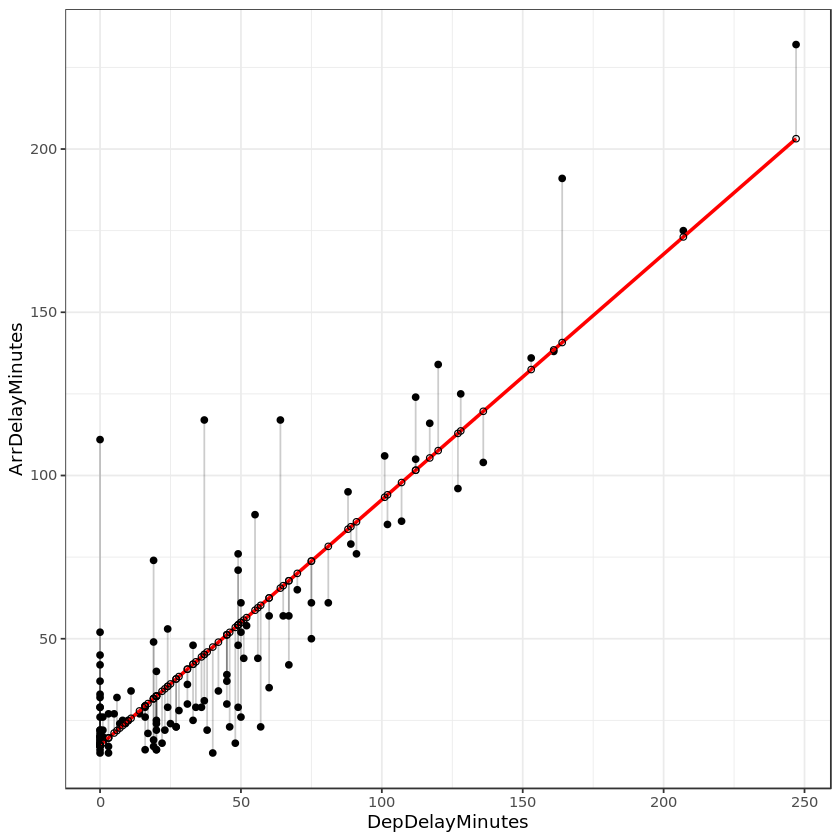

In [39]:
aa_delays <- sub_airline %>%
  filter(CarrierDelay != "NA", Reporting_Airline == "AA")
score_model <- lm(ArrDelayMinutes ~ DepDelayMinutes, data = aa_delays)
aa_delays$predicted <- predict(score_model)

ggplot(aa_delays, aes(x = DepDelayMinutes, y = ArrDelayMinutes)) +
  geom_point() +
  geom_smooth(method = "lm", se=FALSE, color = "red") +  # Plot regression slope. se=FALSE removes the standard error (se)
  geom_segment(aes(xend = DepDelayMinutes, yend = predicted), alpha = .2) +  # alpha to fade lines
  #geom_point() +
  geom_point(aes(y = predicted), shape = 1) + #shows the predicted values marked on the linear model
  theme_bw()  # Add theme for cleaner look

Next, you can create a residual plot, which graphs the residuals (light gray lines in the previous graph) against the observed DepDelayMinutes. The code to do this is similar to a normal scatterplot, but you pass in the linear model `lm(ArrDelayMinutes ~ DepDelayMinutes)` and when setting the y axis, you can use `.resid` which will use the residuals from the model you inputted.

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>


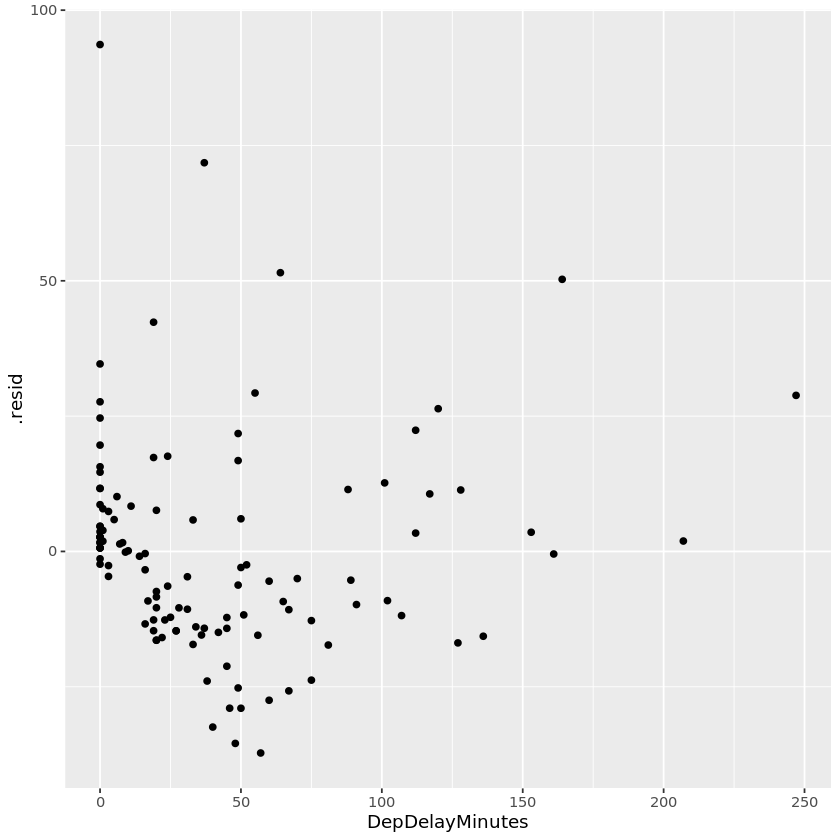

In [85]:
#residual plot
ggplot(lm(ArrDelayMinutes ~ DepDelayMinutes, data = aa_delays)) +
  geom_point(aes(x=DepDelayMinutes, y=.resid))

### Other Diagnostic Plots

In addition to residual plots, there are other useful plots.
A simple way to view diagnostic plots is to first create the linear model using `lm()`, then call base R's `plot()` function on the model.

The below code will output four graphs:

1.  **Reisudal plot**: Identical to the graph we made with ggplot, here it again shows that the residuals are not randomly spread around the x-axis.
2.  **Q-Q plot**: The dotted diagonal line represents what normally distributed error (residual) values would follow. In this case, the residuals do not look normally distributed since there are many observations that fall above the line on the right side.
3.  **Scale-location plot**: This plot helps check the homoscedasticity assumption. Here, it shows a red line that is not straight and validates the homoscedasticity assumption is not satisfied.
4.  **Residuals vs leverage plot**: This helps determine **influential points**. Any points outside the dotted lines (Cook's distance) would make it influential. Here, none of the points cross the lines, however several points come close and could be removed or analyzed further.


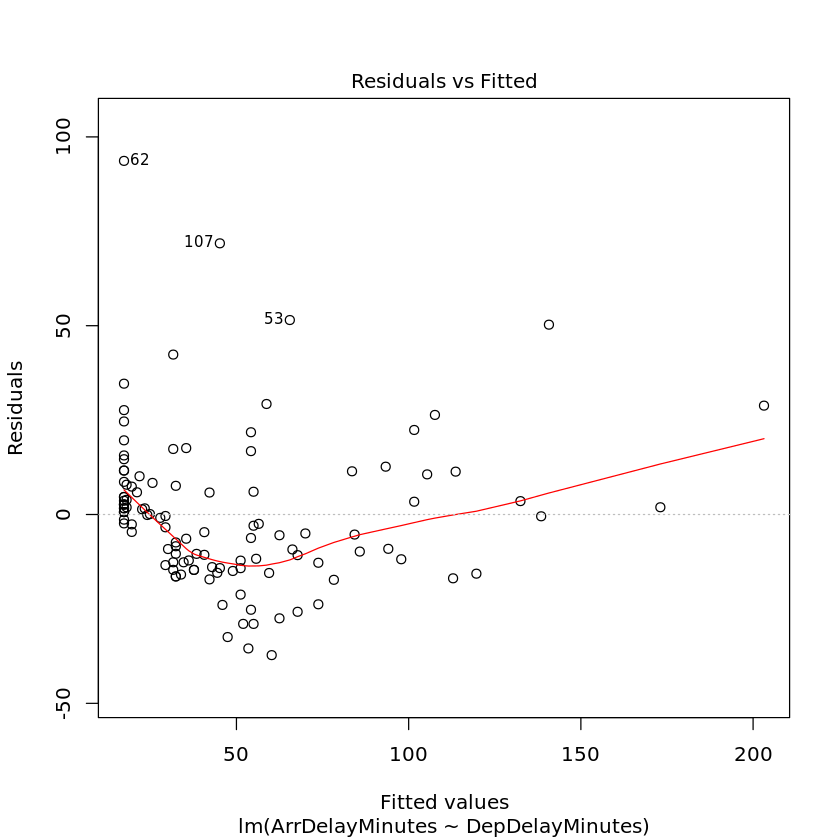

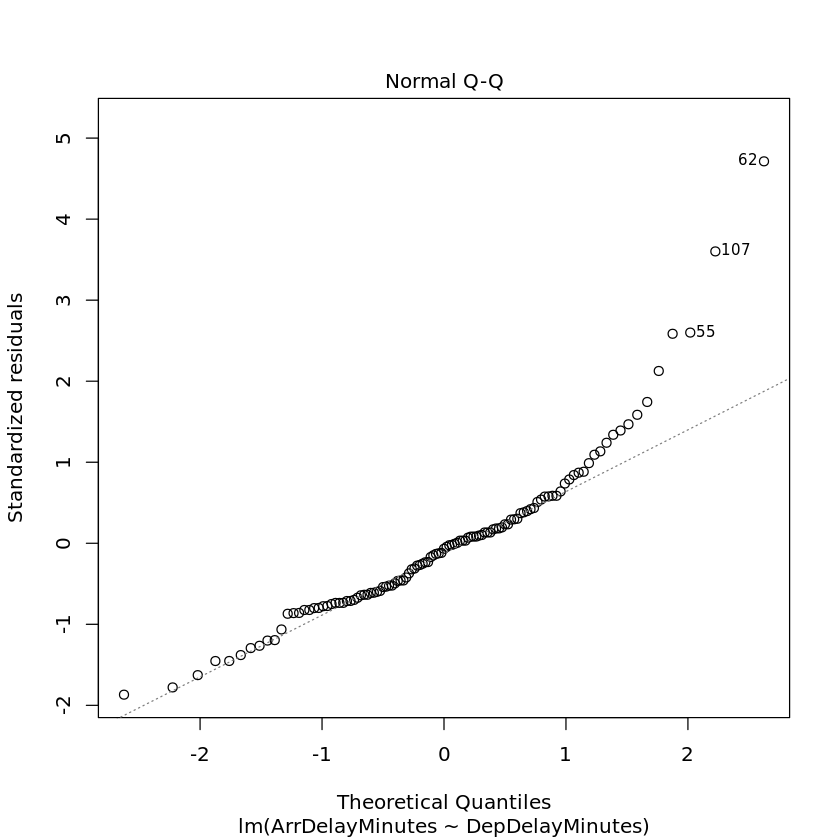

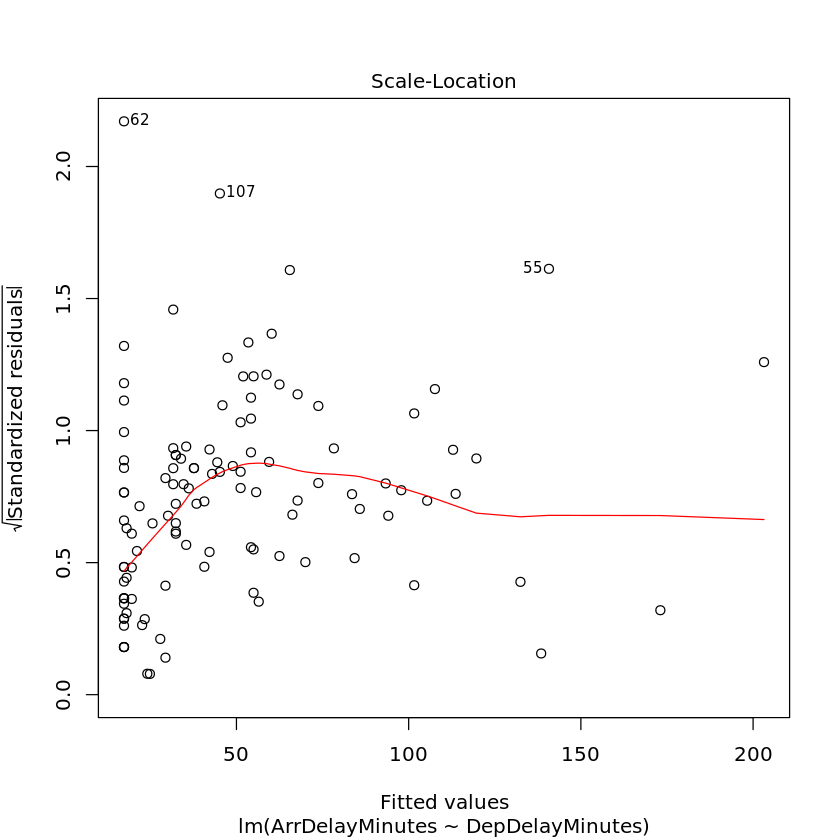

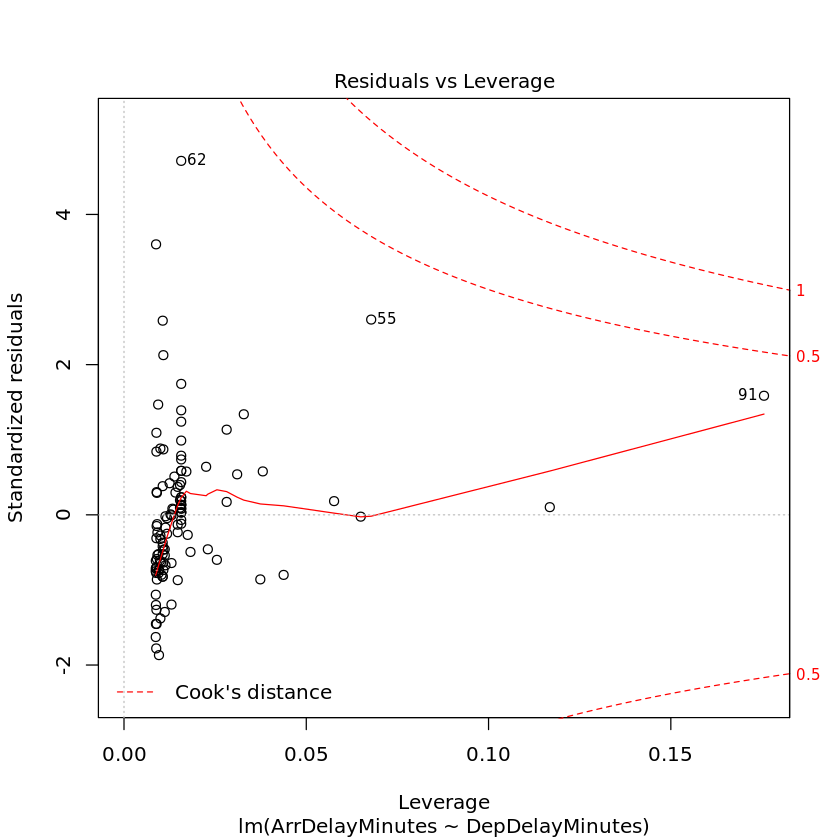

In [47]:
linear_model <- lm(ArrDelayMinutes ~ DepDelayMinutes, data = aa_delays)
plot(linear_model)

<a class="anchor" id="poly_reg"></a>

## 4. Polynomial Regression


**Polynomial regression** is a particular case of the general linear regression model or multiple linear regression models. That is, although the data is nonlinear in polynomial regression (the predicator variables have higher order terms), the model in all cases is **linear**. The model is always **linear** because it predicts the coefficients ($b\_0, b\_1, ...$) which are always of order 1.

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd order</b></center>
$$
Y = b_0 + b_1 X + b_2 X^2 
$$
<br>
<center><b>Cubic - 3rd order</b></center>
$$
Y = b_0 + b_1 X +b_2 X^2 +b_3 X^3
$$
<br>
<center><b>Higher ($n^{th}$) order</b>:</center>
$$
Y = b_0 + b_1 X +b_2 X^2 +b_3 X^3 .... + b_n X^n\\\\
$$


Let's look at the below example. Here, we create random predictor variable `q` and random response variable `y` that follows a 3rd order polynomial but then we add some random noise to it to get `noise.y`. We set the seed so that this result can be reproduced.


In [55]:
set.seed(20)
x <- seq(from=0, to=20, by=0.1)

# value to predict (y):
y <- 500 + 0.4 * (x-10)^3

# some noise is generated and added to the real signal (y):
noise <- rnorm(length(x), mean=10, sd=80)
noise.y <- y + noise

#see the length of x
length(x)

head(x)
head(y)
head(noise)
head(noise.y)

[1] 201

[1] 0.0 0.1 0.2 0.3 0.4 0.5

[1] 100.0000 111.8804 123.5232 134.9308 146.1056 157.0500

[1] 103.01482 -36.87396 152.83720 -96.60750 -25.72534  55.56849

[1] 203.01482  75.00644 276.36040  38.32330 120.38026 212.61849

In the graph below, we fit a first order linear model to this example dataset and can see that the model does not fit the data very well.


`geom_smooth()` using formula 'y ~ x'


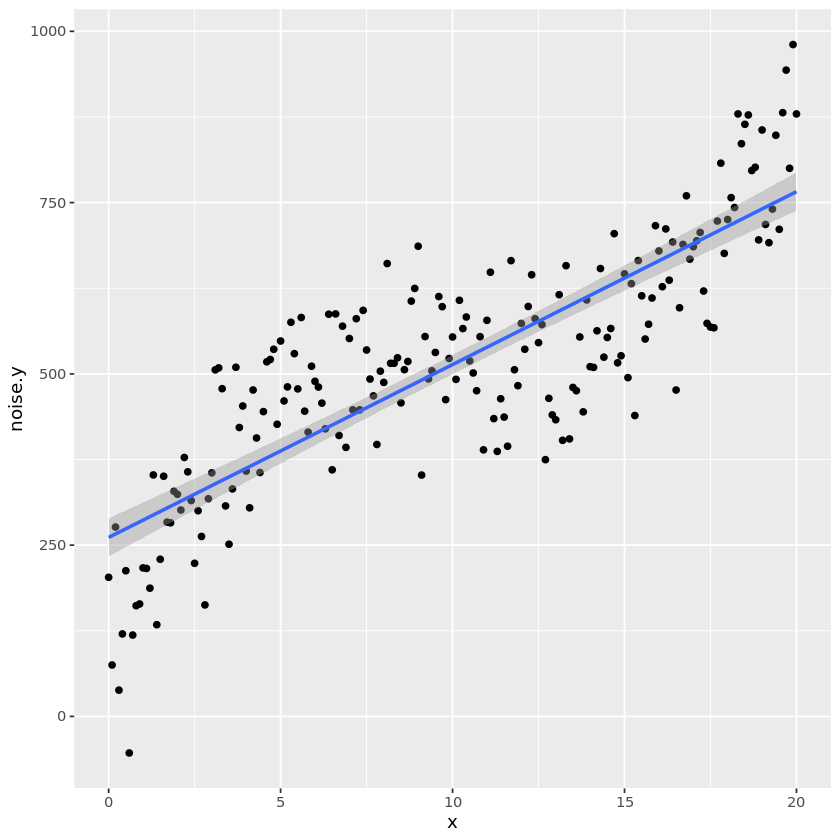

In [52]:
# fit linear model
ggplot(data=NULL,aes(x, noise.y)) + 
    geom_point() + 
    geom_smooth(method = "lm")

Instead, we can use a polynomial model. It is similar to the first order linear model except that you include `poly()` within `geom_smooth()` to indicate what order polynomial to use. For example, using `poly(x, 5)` equates to having $b\_0 + b\_1 X^2 +b\_2 X^2 +b\_3 X^3 + b\_4 X^4 + b\_5 X^5$.


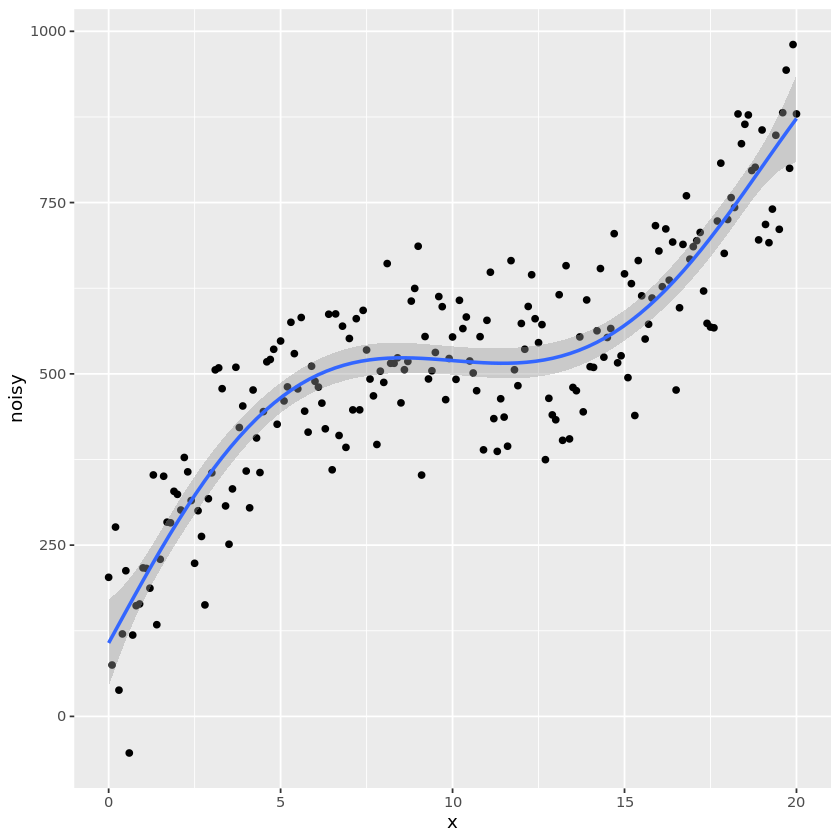

In [62]:
ggplot(data=NULL,aes(x, noisy)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 5))

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


### Polynomial 2nd Order

Now let's look at another example, this time using a 2nd order polynomial. Again, we use a toy dataset where `time` is the predictor and `temp` is the response.


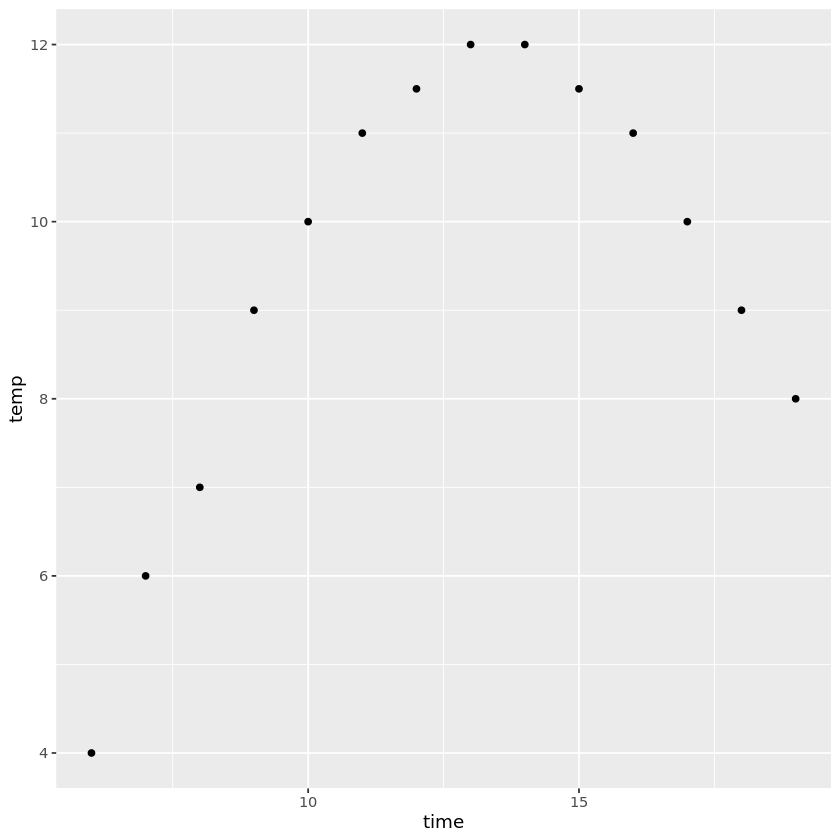

In [67]:
time <- 6:19
temp <- c(4,6,7,9,10,11,11.5,12,12,11.5,11,10,9,8)

ggplot(data = NULL, aes(time, temp)) + # NB: data = NULL, ie. its not taken from any data source
    geom_point() 

We can create a model like how we saw before using `lm()` and to include higher order, you can used `poly()`.

For this dataset, we try a 2nd order polynomial model to see how it fits. The equation the model follows is:
$$
temp = b\_0 + b\_1 \* time + b\_2 \* time^2
$$


In [65]:
polyfit2 <- lm(temp ~ poly(time, 2, raw = TRUE)) #specify raw = TRUE to get the true coefficients

summary(polyfit2)


Call:
lm(formula = temp ~ poly(time, 2, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52005 -0.06387  0.03970  0.15543  0.21250 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -13.710165   0.601247  -22.80 1.30e-10 ***
poly(time, 2, raw = TRUE)1   3.760920   0.102822   36.58 7.69e-13 ***
poly(time, 2, raw = TRUE)2  -0.138393   0.004071  -33.99 1.71e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2197 on 11 degrees of freedom
Multiple R-squared:  0.9931,	Adjusted R-squared:  0.9918 
F-statistic: 791.3 on 2 and 11 DF,  p-value: 1.301e-12


From the summary output of the model, you can find the coefficients, so to predict temp, you could use:
$$
temp = -13.7 + 3.76 \* time - 0.138 \* time^2
$$

Like for the first order linear models, you can use `ggplot` to graph the model.


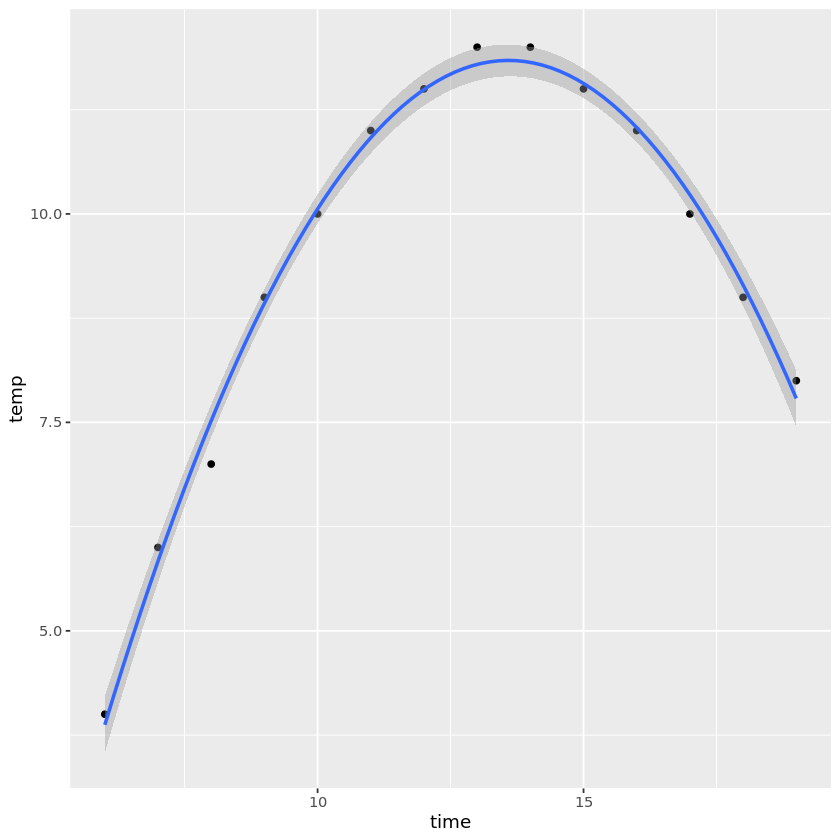

In [79]:
ggplot(data = NULL, aes(time, temp)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 2)) 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4 a):</h1>
<b>Create a 4th order polynomial model with the variables time and temp from above and display the summary of the model. </b>
</div>


In [71]:
# Write your code below and press Shift+Enter to execute 
polyfit4 <- lm(temp ~ poly(time, 4, raw = TRUE))
summary(polyfit4)


Call:
lm(formula = temp ~ poly(time, 4, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33403 -0.05810 -0.01222  0.07299  0.26814 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)  
(Intercept)                 0.9580273  5.3098909   0.180   0.8608  
poly(time, 4, raw = TRUE)1 -1.6827915  1.9381916  -0.868   0.4078  
poly(time, 4, raw = TRUE)2  0.5770452  0.2523955   2.286   0.0481 *
poly(time, 4, raw = TRUE)3 -0.0397085  0.0139698  -2.842   0.0193 *
poly(time, 4, raw = TRUE)4  0.0007906  0.0002788   2.836   0.0195 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1763 on 9 degrees of freedom
Multiple R-squared:  0.9964,	Adjusted R-squared:  0.9947 
F-statistic: 616.4 on 4 and 9 DF,  p-value: 5.787e-11


<details>
    <summary>Click here for the solution.</summary>

```r
# calculate polynomial
polyfit4 <- lm(temp ~ poly(time, 4, raw = TRUE))
# print results
summary(polyfit4)
```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4 b):</h1>
<b>Using the predicted coefficients from the summary output for the 4th order model, write down the model equation.</b>
</div>


*You can type your answer here.*

temp = 0.96 - 1.68*time + 0.58*(time)^2 - 0.04*(time)^3 + 0.00*(time)^4

<details>
    <summary>Click here for the solution.</summary>

```r
temp = 0.9580 -1.683 * time 
    + 0.5770 * time^2 
    - 0.03971 * time^3 
    + 0.0007906 * time^4
```

</details>


<a class="anchor" id="assess"></a>

## 5. Assessing the Model


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

1.  R^2 / R-squared
2.  Mean Squared Error (MSE)

**R-squared**

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

**Mean Squared Error (MSE)**
$$
MSE = average((\hat{y} - y)^2) \\\\
RMSE = \sqrt{MSE}
$$
The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ). Another metric that is related to MSE is **root mean squared error (RMSE)** and is simply the square root of MSE.


<h3>Model 1: Simple Linear Regression</h3>

Let's use the simple linear regression model we created in section 2.


In [80]:
linear_model <- lm(ArrDelayMinutes ~ DepDelayMinutes, aa_delays)
linear_model


Call:
lm(formula = ArrDelayMinutes ~ DepDelayMinutes, data = aa_delays)

Coefficients:
    (Intercept)  DepDelayMinutes  
        17.3544           0.7523  


Using this model, you can calculate MSE and RMSE. From below, MSE is 394 and RMSE is 19.85.


In [89]:
mse <- mean(linear_model$residuals^2)
mse

[1] 394.0639

In [25]:
rmse <- sqrt(mse)
rmse

[1] 19.85104

R^2 can be obtained from the summary of the model. From the output below, we can say that approximately 75.9% of the variation of the ArrivalDelayMinutes is explained by this simple linear model.


In [90]:
summary(linear_model)$r.squared

[1] 0.7588008

<h3>Model 2: Multiple Linear Regression</h3>

Next, let's use the multiple linear regression model we created in section 3.


In [96]:
mlr <- lm(ArrDelayMinutes ~ DepDelayMinutes + LateAircraftDelay, data = aa_delays)
mlr


Call:
lm(formula = ArrDelayMinutes ~ DepDelayMinutes + LateAircraftDelay, 
    data = aa_delays)

Coefficients:
      (Intercept)    DepDelayMinutes  LateAircraftDelay  
         17.31707            0.75556           -0.01028  


Let's calculate MSE and RMSE. From below, MSE is 394 and RMSE is 19.849.


In [97]:
mse_mlr <- mean(mlr$residuals^2)
mse_mlr

[1] 394.0113

In [98]:
rmse_mlr <- sqrt(mse_mlr)
rmse_mlr

[1] 19.84972

From the r-squared value belwo, we can say that approximately 75.9 % of the variation of Arrival Delay Minutes is explained by this multiple linear regression "mlr".


In [99]:
summary(mlr)$r.squared

[1] 0.7588329

### Model 3: Polynomial Regression

Finally, we can use a polynomial regression model using the skills from section 5.


In [104]:
poly_reg <- lm(ArrDelayMinutes ~ poly(DepDelayMinutes, 3), data = aa_delays)
poly_reg


Call:
lm(formula = ArrDelayMinutes ~ poly(DepDelayMinutes, 3), data = aa_delays)

Coefficients:
              (Intercept)  poly(DepDelayMinutes, 3)1  
                    48.93                     377.58  
poly(DepDelayMinutes, 3)2  poly(DepDelayMinutes, 3)3  
                    69.94                     -50.93  


Similar to model 1 and 2, you can find MSE, RMSE, and R^2. Here the MSE is 328.97, RMSE is 19.85, and R^2 is 0.798.


In [105]:
mse_poly <- mean(poly_reg$residuals^2)
mse_poly

[1] 328.9701

In [102]:
rmse_poly <- sqrt(mse)
rmse_poly

[1] 19.85104

In [106]:
summary(poly_reg)$r.squared

[1] 0.7986434

<a class="anchor" id="pred"></a>

## 6. Prediction and Decision Making

### Prediction

Previously, we trained the model using the method `lm()` and we used the method `predict()` to produce a prediction.


In [107]:
# For example we want to predict the score model we created in a previous section
head(predict(score_model))

1        2        3        4        5        6 
17.35443 83.55480 38.41818 73.77520 62.49104 67.75698

<h3>Decision Making: Determining a Good Model Fit</h3>


Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

*   What is a good **R-squared** value?
    *   When comparing models, the model with the *higher R-squared* value is a better fit for the data.
*   What is a good **MSE**?
    *   When comparing models, the model with the *smallest MSE* value is a better fit for the data.

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using DepDelayMinutes as a Predictor Variable of ArrDelayMinutes.
<ul>
    <li>R-squared: 0.7588</li>
    <li>MSE: 394.063</li>
</ul>
</p>

<p>Multiple Linear Regression: Using DepDelayMinutes and LateAircraftDelay as Predictor Variables of ArrDelayMinutes.
<ul>
    <li>R-squared: 0.75883</li>
    <li>MSE: 394.0113</li>
</ul>
</p>

<p>Polynomial Fit: Using 3rd Oder Polynomial of DepDelayMinutes as a Predictor Variable of ArrDelayMinutes
<ul>
    <li>R-squared: 0.7986</li>
    <li>MSE: 328.9701</li>
</ul>
</p>


<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.</p>

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

*   MSE: The MSE of SLR model is 394.063 while MLR has an MSE of 394.0113.  The MSE of MLR model is ever slightly smaller.
*   R-squared: In this case, we can see that the R-squared for the SLR is a little lower than the R-squared for the MLR model.

This R-squared in combination with the MSE show that MLR seems like a slightly better model fit in this case, compared to SLR. However, you could try adding more predictor variables in the MLR model to see if that made a bigger improvement since in our example only two were used.


<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial model brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting ArrDelayMinutes.</p>


<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the polynomial model is smaller than the MSE for the MLR model.</li>
    <li><b>R-squared</b>: The R-squared for the polynomial model is also larger than the MLR model's.</li>
</ul>


<h2>Conclusion:</h2>


Comparing these three models, the MLR model performs slightly better than the SLR model. Perhaps if we tried adding some more predictor variables, the MLR model could do even better. Of the three models, we conclude that the *polynomial of order 3 model* seems to be the best fit it as it has the highest R^2 and the lowest MSE.

As a bonus, you can try using more predictor variables and different order polynomials to perhaps find even better results.


<h1>Thank you for completing this notebook</h1>


<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/yiwen-li-47a019119/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2021-01-01" target="_blank">Yiwen Li</a> and <a href="https://www.linkedin.com/in/gabrieladequeiroz/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2021-01-01" target="_blank">Gabriela de Queiroz</a>.

<a href="https://www.linkedin.com/in/yiwen-li-47a019119/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2021-01-01" target="_blank">Yiwen Li</a> is a developer advocate and data scientist at IBM. She has been creating online content such as code patterns, tutorials, and blogs demonstrating the potential of products and services offered by IBM (like Watson Studio, Machine learning, Model Asset eXchange, Data Asset eXchange, etc.). She holds dual degree, including BS in Probability and Statistics and BA in Economics from the University of California, San Diego.

<a href="https://www.linkedin.com/in/gabrieladequeiroz/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2021-01-01" target="_blank">Gabriela de Queiroz</a> is a Sr. Engineering & Data Science Manager at IBM where she manages and leads a team of developers working on Data & AI Open Source projects. She works to democratize AI by building tools and launching new open source projects.
She is the founder of AI Inclusive, a global organization that is helping increase the representation and participation of gender minorities in Artificial Intelligence. She is also the founder of R-Ladies, a worldwide organization for promoting diversity in the R community with more than 190 chapters in 50+ countries.
She has worked in several startups and where she built teams, developed statistical models, and employed a variety of techniques to derive insights and drive data-centric decisions.


Copyright © 2021 IBM Corporation. All rights reserved.
